In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, MultiLabelBinarizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

In [180]:
intr_data = pd.read_csv('kddcup_network_intrusion.csv')

In [181]:
intr_data.shape

(494021, 43)

In [182]:
intr_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [183]:
intr_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [184]:
columns = ['protocol_type', 'flag', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type']

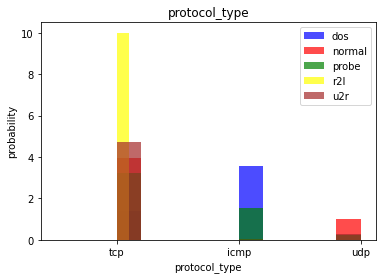

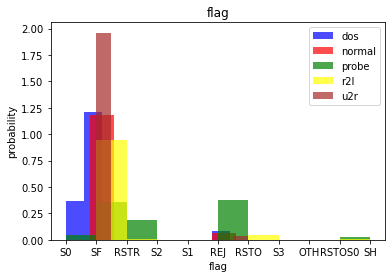

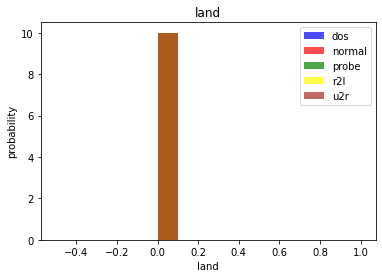

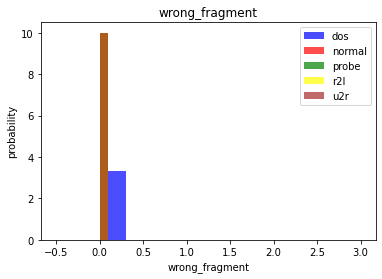

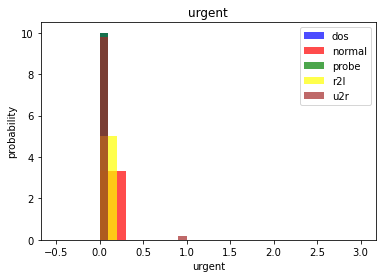

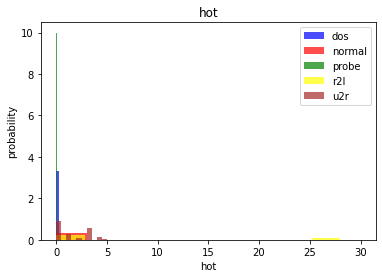

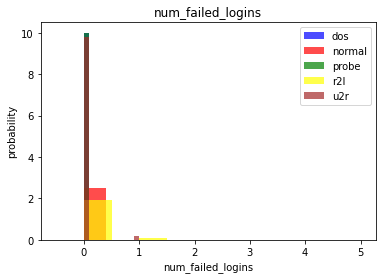

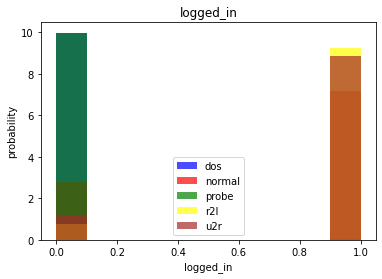

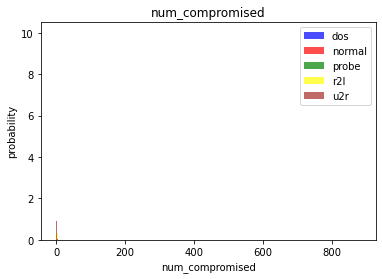

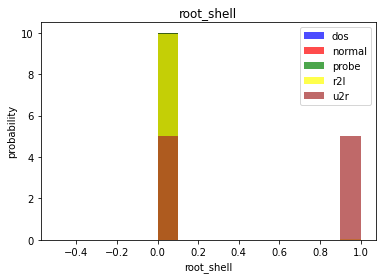

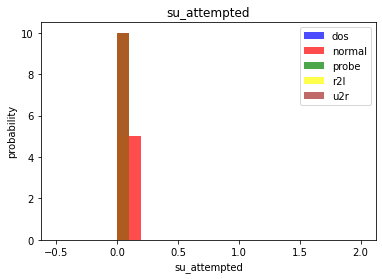

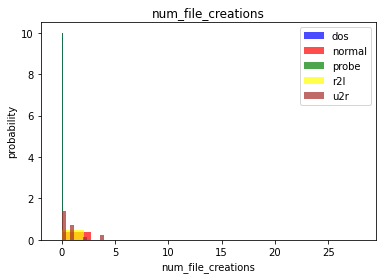

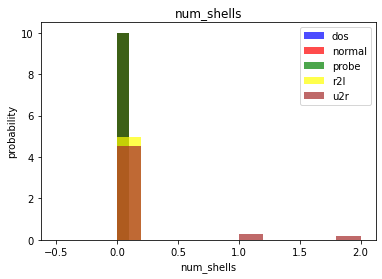

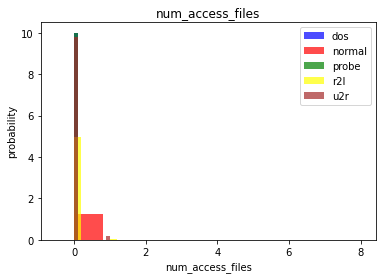

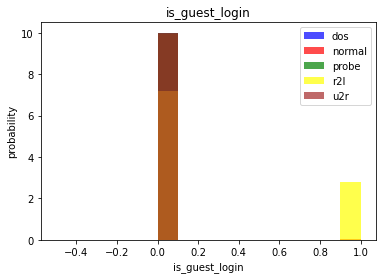

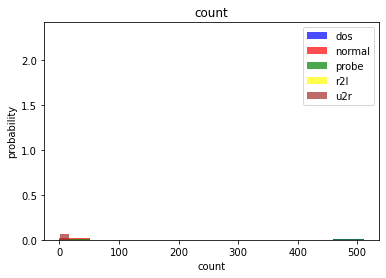

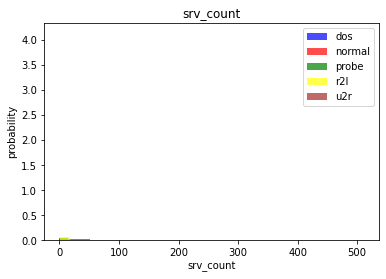

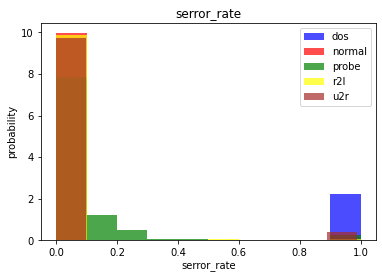

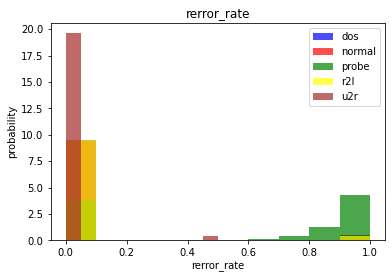

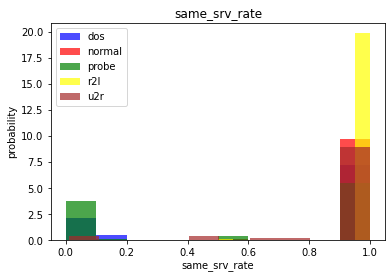

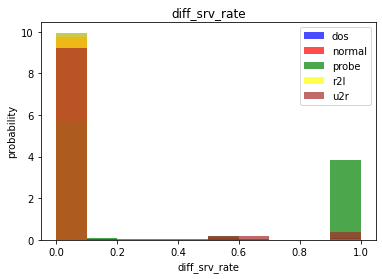

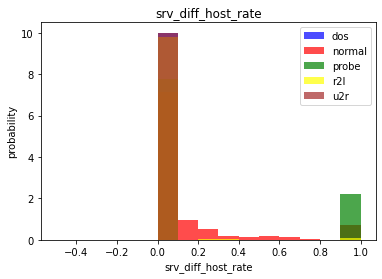

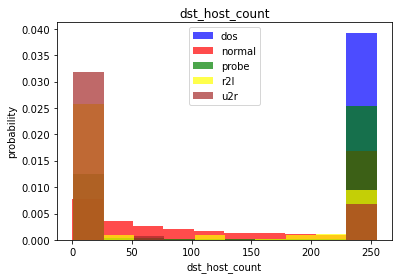

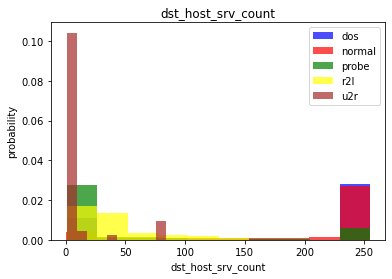

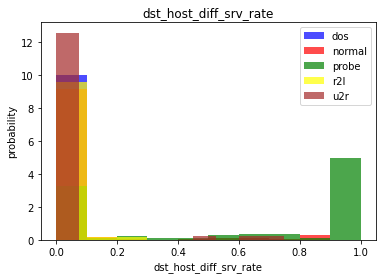

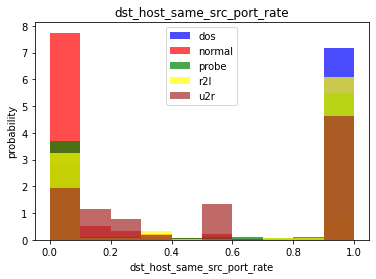

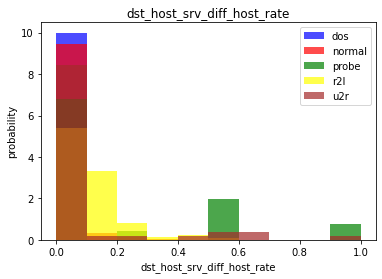

In [185]:
columns = ['protocol_type', 'flag', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type']

for label in columns[:-1]:
    plt.hist(intr_data[intr_data['Attack Type']=='dos'][label], color='blue', label='dos', alpha=0.7, density=True) # inside df get all where class = 1
    plt.hist(intr_data[intr_data['Attack Type']=='normal'][label], color='red', label='normal', alpha=0.7, density=True) # inside df get all where class = 0
    plt.hist(intr_data[intr_data['Attack Type']=='probe'][label], color='green', label='probe', alpha=0.7, density=True) # inside df get all where class = 0
    plt.hist(intr_data[intr_data['Attack Type']=='r2l'][label], color='yellow', label='r2l', alpha=0.7, density=True) # inside df get all where class = 0
    plt.hist(intr_data[intr_data['Attack Type']=='u2r'][label], color='brown', label='u2r', alpha=0.7, density=True) # inside df get all where class = 0

    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

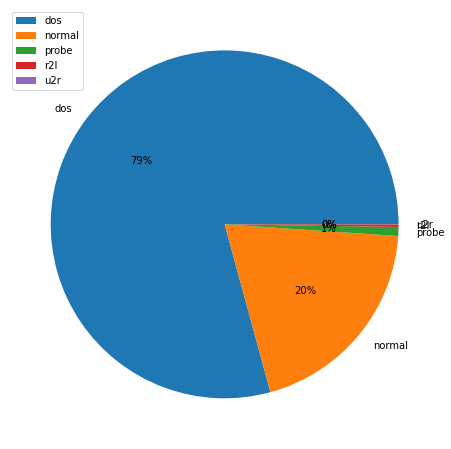

In [186]:
#visualizing the type of attackss to see which are more common
attack = intr_data['Attack Type'].value_counts()
transaction = attack.index
count = attack.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

In [187]:
intr_data['Attack Type'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [188]:
pd.DataFrame({'# of unique values' : intr_data.nunique(), 
             "# of missing values": intr_data.isnull().sum(),
             "# of null values": intr_data.isna().sum(),
             "DataTypes": intr_data.dtypes
             })

,# of unique values,# of missing values,# of null values,DataTypes
duration,2495,0,0,int64
protocol_type,3,0,0,object
service,66,0,0,object
flag,11,0,0,object
src_bytes,3300,0,0,int64
dst_bytes,10725,0,0,int64
land,2,0,0,int64
wrong_fragment,3,0,0,int64
urgent,4,0,0,int64
hot,22,0,0,int64


In [189]:
intr_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
# finding catergorical features
num_cols = intr_data._get_numeric_data().columns

cate_cols = list(set(intr_data.columns) - set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'flag', 'service']

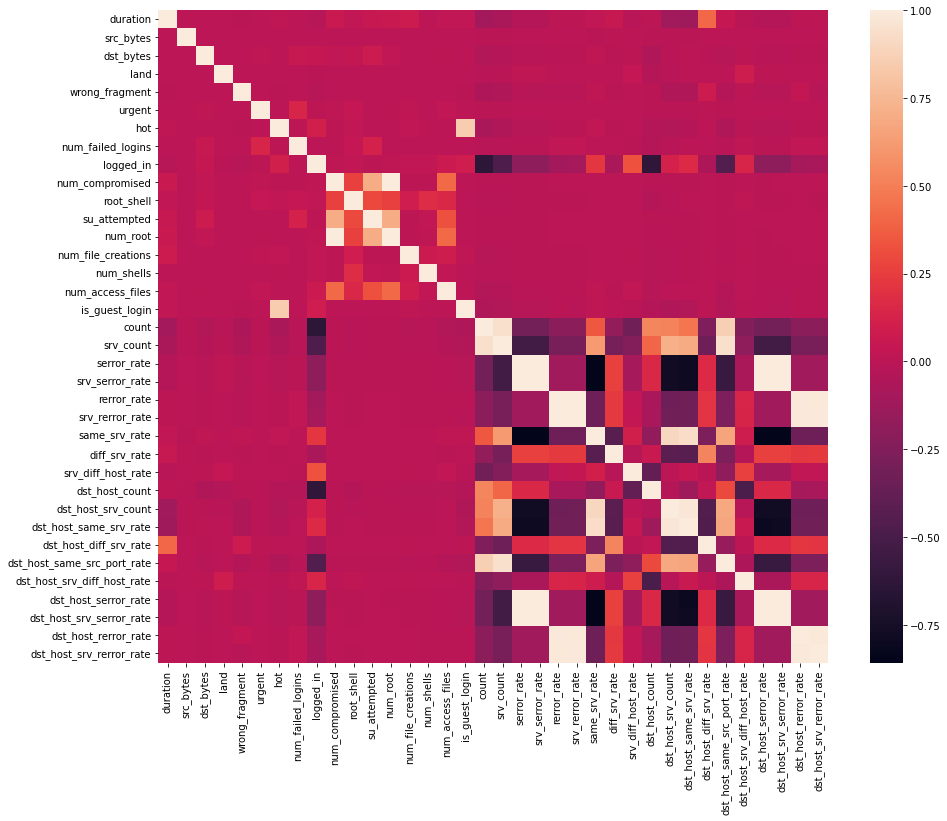

In [191]:
intr_data.dropna('columns')
# keep cols with more than 1 unique val
intr_data = intr_data[[col for col in intr_data if intr_data[col].nunique() > 1]]
corr = intr_data.corr()

plt.figure(figsize = (15, 12))
sns.heatmap(corr)
plt.show()

In [192]:


# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
intr_data.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
intr_data.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
intr_data.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
intr_data.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
intr_data.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
intr_data.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
intr_data.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
intr_data.drop('dst_host_same_srv_rate', axis = 1, inplace = True)



In [193]:
# protocol_type feature mapping
pmap = {'icmp':0, 'tcp':1, 'udp':2}
intr_data['protocol_type'] = intr_data['protocol_type'].map(pmap)

# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
intr_data['flag'] = intr_data['flag'].map(fmap)


In [194]:
intr_data.drop('service', axis = 1, inplace = True)

In [195]:
intr_data.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [196]:
encoder = LabelEncoder()
intr_data['Attack Type'] = encoder.fit_transform(intr_data['Attack Type'])

In [197]:
pd.DataFrame(intr_data).head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,1
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,1
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,1
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,1
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,1


<AxesSubplot:xlabel='Attack Type', ylabel='Attack Type'>

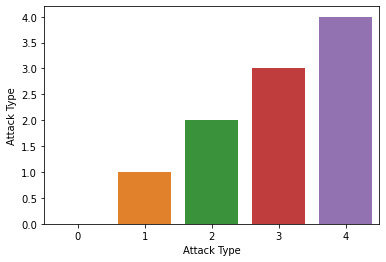

In [198]:
sns.barplot(x=intr_data["Attack Type"], y=intr_data["Attack Type"])

In [199]:
# Splitting the dataset
intr_data = intr_data.drop(['target', ], axis = 1)
print(intr_data.shape)

# Target variable and train set
y = intr_data[['Attack Type']]
X = intr_data.drop(['Attack Type'], axis = 1)

(494021, 31)


In [200]:
sc = StandardScaler()
ros = RandomOverSampler()
# X, y = ros.fit_resample(X, y)

In [201]:
# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [202]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
start_time = time.time()
gnb.fit(X_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = gnb.predict(X_test)
cmatGB = confusion_matrix(y_test, y_test_pred, normalize='true')

end_time = time.time()
print("Testing time: ", end_time-start_time)
print(classification_report(y_test, y_test_pred))


Training time:  0.19392991065979004
Testing time:  0.12719035148620605
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    129106
           1       0.94      0.55      0.70     32167
           2       0.09      0.03      0.04      1348
           3       0.20      0.04      0.07       387
           4       0.01      0.84      0.01        19

    accuracy                           0.90    163027
   macro avg       0.43      0.49      0.35    163027
weighted avg       0.91      0.90      0.89    163027



In [203]:
# Logistic Regression

<AxesSubplot:>

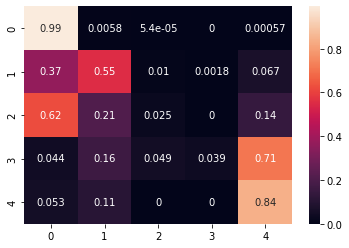

In [204]:
# Plott the confusion matrix
sns.heatmap(cmatGB, annot=True)

In [205]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
start_time = time.time()
lg.fit(X_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = lg.predict(X_test)
cmatLG = confusion_matrix(y_test, y_test_pred, normalize='true')

end_time = time.time()
print("Testing time: ", end_time-start_time)
print(classification_report(y_test, y_test_pred))

Training time:  35.75034952163696
Testing time:  0.06491374969482422
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    129106
           1       0.95      0.96      0.96     32167
           2       0.33      0.02      0.04      1348
           3       0.86      0.02      0.03       387
           4       0.00      0.00      0.00        19

    accuracy                           0.98    163027
   macro avg       0.63      0.40      0.40    163027
weighted avg       0.97      0.98      0.97    163027



<AxesSubplot:>

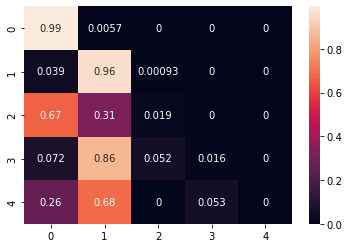

In [206]:
sns.heatmap(cmatLG, annot=True)

## Neural Net

In [207]:
import tensorflow as tf

In [208]:
def train_net(X_train, y_train, num_nodes, dropout_prob, 
              lr, batch_size, epochs):
    
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(30,)),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(loss='categorical_crossentropy', optimizer='Adam', 
               metrics='accuracy')

    nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    
    return nn_model

In [209]:

epochs = 2
num_nodes = 64
dropout_prob = 0.2
lr = 0.01
batch_size = 120

print(f'nodes = {num_nodes}, dropout = {dropout_prob}, lr = {lr}, batch size = {batch_size}')
nn_model = train_net(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)

    

nodes = 64, dropout = 0.2, lr = 0.01, batch size = 120
Epoch 1/2
2207/2207 [==============================] - 6s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7952 - val_loss: 0.0000e+00 - val_accuracy: 0.7939
Epoch 2/2
2207/2207 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7986 - val_loss: 0.0000e+00 - val_accuracy: 0.7962


In [210]:
y_pred = nn_model.predict(X_test)

cmatNN = confusion_matrix(y_test, y_pred, normalize='true')
print(classification_report(y_test, y_pred))

5095/5095 [==============================] - 6s 1ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89    129106
           1       0.96      0.03      0.06     32167
           2       0.00      0.00      0.00      1348
           3       0.00      0.00      0.00       387
           4       0.00      0.00      0.00        19

    accuracy                           0.80    163027
   macro avg       0.35      0.21      0.19    163027
weighted avg       0.82      0.80      0.72    163027



<AxesSubplot:>

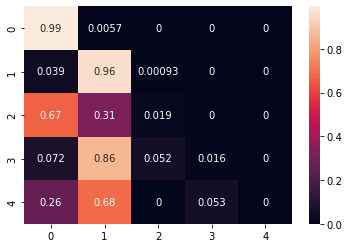

In [211]:
sns.heatmap(cmatLG, annot=True)

In [212]:
lg_score = lg.score(X_train, y_train)
gnb_score = gnb.score(X_train, y_train)

In [213]:
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy  : {:.4f}'.format(accuracy))

Accuracy  : 0.7984


<BarContainer object of 3 artists>

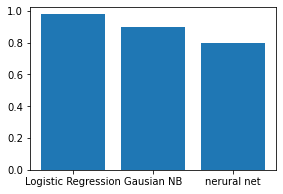

In [214]:
names = ['Logistic Regression', 'Gausian NB', 'nerural net']
values = [lg_score, gnb_score, accuracy]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)